# Clean Four Seam Fastballs

Make a clean sample of four seam fastballs

In [1]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from random import randrange
import scipy.stats as sst

# ipython reload capabilities for edits to external code
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import pandas as pd

import glob

In [2]:
from src.ellipse import *

In [3]:
# start by selecting your year of interest
year = '2020'

# todo: add cross-year slices

In [4]:
# pull in the codes for statcast queries

PlayerDict = dict()
f = open('data/playerdict'+year+'.txt')

line = f.readline()

line = f.readline()

while line:
    PlayerDict[line.split(',')[0].strip()] = line.split(',')[1].strip()
    line = f.readline()

f.close()
print(PlayerDict['Jose Berrios'])

621244


In [5]:
year = '2020'
plr_files = glob.glob('data/*'+year+'.csv')
saved_plrs = [d.strip('data/').strip('.csv').strip('_'+year) for d in plr_files]

In [6]:
# version where we read in the saved files
BPDict = {}

BPDict[year] = {}

for pindx,pnumber in enumerate(saved_plrs):

    link = plr_files[pindx]
    BPDict[year][pnumber] = pd.read_csv(link, low_memory=False)

In [7]:
year = '2019'
plr_files = glob.glob('data/*'+year+'.csv')
saved_plrs = [d.strip('data/').strip('.csv').strip('_'+year) for d in plr_files]
BPDict[year] = {}

for pindx,pnumber in enumerate(saved_plrs):

    link = plr_files[pindx]
    BPDict[year][pnumber] = pd.read_csv(link, low_memory=False)

In [8]:

indx = 0
plr = saved_plrs[indx]


# here's everything we have access to now!
BPDict[year][plr].keys()

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [9]:
# these are the translations from categories to numbers

PitchDict = {'CH':0,\
             'CU':1,\
             'EP':2,\
             'FO':3,\
             'FA':4,\
             'KN':5,\
             'KC':6,\
             'SC':7,\
             'SI':8,\
             'SL':9,\
             'FC':10,\
             'FS':11,\
            'FT':12,\
            'FF':13,\
            'PO':14,
            'nan':15,
            'CS':16}


iPitchDict = {0:'CH',\
             1:'CU',\
             2:'EP',\
             3:'FO',\
             4:'FA',\
             5:'KN',\
             6:'KC',\
             7:'SC',\
             8:'SI',\
             9:'SL',\
             10:'FC',\
             11:'FS',\
            12:'FT',\
            13:'FF',\
            14:'PO',\
             15:'nan',\
             16:'CS'}



In [63]:
# put the data in a recognisable format

X = []
ptype = []
pname = []
poutcome = []

year = '2020'
#for plr in check_players:
for plr in saved_plrs:

    Xtmp = np.array([BPDict[year][plr]['release_pos_x'],BPDict[year][plr]['release_pos_z'],\
                 BPDict[year][plr]['plate_x'],BPDict[year][plr]['plate_z'],\
                 BPDict[year][plr]['vx0'],BPDict[year][plr]['vy0'],BPDict[year][plr]['vz0'],\
                 BPDict[year][plr]['ax'],BPDict[year][plr]['ay'],BPDict[year][plr]['az'],\
             BPDict[year][plr]['release_spin_rate'],BPDict[year][plr]['effective_speed']]).T
    
    for val in BPDict[year][plr]['pitch_type']:
        if val not in PitchDict.keys(): 
            print(val)
            PitchDict[val] = 17
            
    ptypetmp = np.array([PitchDict[x] for x in BPDict[year][plr]['pitch_type']])
    pnametmp = np.array([plr for x in BPDict[year][plr]['pitch_type']])
    poutcometmp = np.array([x for x in BPDict[year][plr]['events']])



    # if you want to select only right handers...
    try:
        if BPDict[year][plr]['p_throws'][0] == 'R':
            for xx in range(0,Xtmp.shape[0]):
                if np.all(np.isfinite(Xtmp[xx])):
                    X.append(Xtmp[xx])
                    ptype.append(ptypetmp[xx])
                    pname.append(pnametmp[xx])
                    poutcome.append(poutcometmp[xx])
    except:
        pass
        

PT2020 = np.array(ptype)
X2020 = np.array(X)
N2020 = np.array(pname)
O2020 = np.array(poutcome)
print(X2020.shape)

(175522, 12)


In [71]:
# np.array([BPDict[year][plr]['release_pos_x'],BPDict[year][plr]['release_pos_z'],\
                 #BPDict[year][plr]['plate_x'],BPDict[year][plr]['plate_z'],\
                 #BPDict[year][plr]['vx0'],BPDict[year][plr]['vy0'],BPDict[year][plr]['vz0'],\
                # BPDict[year][plr]['ax'],BPDict[year][plr]['ay'],BPDict[year][plr]['az'],\
            # BPDict[year][plr]['release_spin_rate'],BPDict[year][plr]['effective_speed']]).T

f = open('processed/fourseamers_2020_R.csv','w')
print('{0},{1},{2},{3},{4},{5},{6},{7},{8},{9},{10},{11},{12},{13}'\
                  .format('pitcher','outcome','xrelease','zrelease','xplate','zplate','vx0','vy0','vz0','ax','ay','az','spin','velocity'),file=f)

for indx in range(0,O2020.size):
    if (PT2020[indx] == 13) & (X2020[indx,10]>0) & (X2020[indx,11]>0):
        print('{0},{1},{2},{3},{4},{5},{6},{7},{8},{9},{10},{11},{12},{13}'\
              .format(N2020[indx],O2020[indx],X2020[indx,0],X2020[indx,1],\
                          X2020[indx,2],X2020[indx,3],X2020[indx,4],X2020[indx,5],\
                          X2020[indx,6],X2020[indx,7],X2020[indx,8],X2020[indx,9],\
                          X2020[indx,10],X2020[indx,11]),file=f)

f.close()

In [11]:
N2020.size

175522

In [60]:
X = []
ptype = []
pname = []
poutcome = []

year = '2019'
#for plr in check_players:
for plr in saved_plrs:

    Xtmp = np.array([BPDict[year][plr]['release_pos_x'],BPDict[year][plr]['release_pos_z'],\
                 BPDict[year][plr]['plate_x'],BPDict[year][plr]['plate_z'],\
                 BPDict[year][plr]['vx0'],BPDict[year][plr]['vy0'],BPDict[year][plr]['vz0'],\
                 BPDict[year][plr]['ax'],BPDict[year][plr]['ay'],BPDict[year][plr]['az'],\
             BPDict[year][plr]['release_spin_rate'],BPDict[year][plr]['effective_speed']]).T
    
    for val in BPDict[year][plr]['pitch_type']:
        if val not in PitchDict.keys(): 
            print(val)
            PitchDict[val] = 17
            
    ptypetmp = np.array([PitchDict[x] for x in BPDict[year][plr]['pitch_type']])
    pnametmp = np.array([plr for x in BPDict[year][plr]['pitch_type']])
    poutcometmp = np.array([x for x in BPDict[year][plr]['events']])



    try:
        if BPDict[year][plr]['p_throws'][0] == 'R':
            for xx in range(0,Xtmp.shape[0]):
                if np.all(np.isfinite(Xtmp[xx])):
                    X.append(Xtmp[xx])
                    ptype.append(ptypetmp[xx])
                    pname.append(pnametmp[xx])
                    poutcome.append(poutcometmp[xx])
    except:
        pass
        

PT2019 = np.array(ptype)
X2019 = np.array(X)
N2019 = np.array(pname)
O2019 = np.array(poutcome)
print(X2019.shape)

(394375, 12)


In [61]:
# np.array([BPDict[year][plr]['release_pos_x'],BPDict[year][plr]['release_pos_z'],\
                 #BPDict[year][plr]['plate_x'],BPDict[year][plr]['plate_z'],\
                 #BPDict[year][plr]['vx0'],BPDict[year][plr]['vy0'],BPDict[year][plr]['vz0'],\
                # BPDict[year][plr]['ax'],BPDict[year][plr]['ay'],BPDict[year][plr]['az'],\
            # BPDict[year][plr]['release_spin_rate'],BPDict[year][plr]['effective_speed']]).T

f = open('processed/fourseamers_2019_R.csv','w')
print('{0},{1},{2},{3},{4},{5},{6},{7},{8},{9},{10},{11},{12},{13}'\
                  .format('pitcher','outcome','xrelease','zrelease','xplate','zplate','vx0','vy0','vz0','ax','ay','az','spin','velocity'),file=f)

for indx in range(0,O2019.size):
    if PT2019[indx] == 13:
        print('{0},{1},{2},{3},{4},{5},{6},{7},{8},{9},{10},{11},{12},{13}'\
                  .format(N2019[indx],O2019[indx],X2019[indx,0],X2019[indx,1],\
                          X2019[indx,2],X2019[indx,3],X2019[indx,4],X2019[indx,5],\
                          X2019[indx,6],X2019[indx,7],X2019[indx,8],X2019[indx,9],\
                          X2019[indx,10],X2019[indx,11]),file=f)

f.close()

In [54]:

pltcategories = ['xrelease','zrelease','xplate','zplate','vx0','vy0','vz0','ax','ay','az','spin','velocity']

In [83]:
PL19 = pd.read_csv('processed/fourseamers_2019_L.csv')
S = pd.read_csv('processed/fourseamers_2020_R.csv')

In [84]:
#w = np.where(PL20['spin']>2900)[0]
#print(w)
#print(PL20['pitcher'][w])

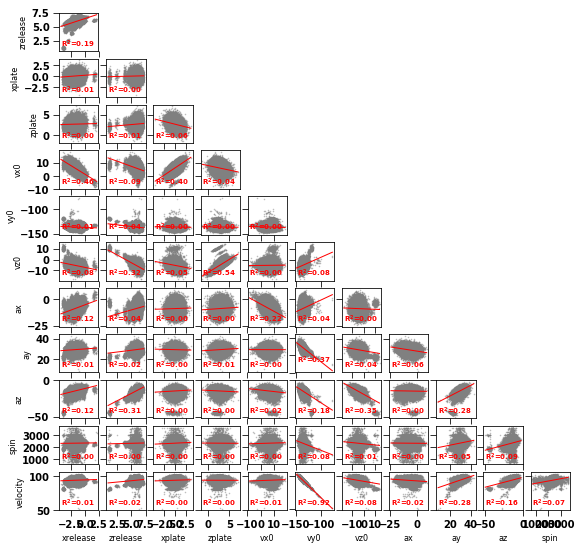

In [87]:
from scipy import stats
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 8


categories = ['xrelease','zrelease','xplate','zplate','vx0','vy0','vz0','ax','ay','az','spin','velocity']

fig = plt.figure(figsize=(10,10))


ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)


#player = b'Michael Petersen'
#my_number = [N[:,1]==player][0]

#player = b'Erich Rentz'
#my_number2 = [N[:,1]==player][0]

#ncategories -= 1

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            
    ax.scatter(S[categories[i]],S[categories[j]],color='grey',s=0.3,alpha=0.5)
        
    #ax.scatter(S[categories[i]][my_number],S[categories[j]][my_number],marker='*',color='red',s=10.)
    #ax.scatter(S[categories[i]][my_number2],S[categories[j]][my_number2],marker='s',color='red',s=10.)



        
    # do the stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(S[categories[i]],S[categories[j]])
    
    xvals = np.linspace(np.nanmin(S[categories[i]]),np.nanmax(S[categories[i]]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    ax.text(np.nanmin(S[categories[i]]),np.nanmin(S[categories[j]]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7)
    
    #ax.set_xlabel(categories[i])
    #ax.set_ylabel(categories[j])
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i])
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j])
    else:
        ax.set_yticklabels(())
        
        
#fig.tight_layout()

plt.savefig('/Users/mpetersen/Downloads/fastball_correlations.png',dpi=300)

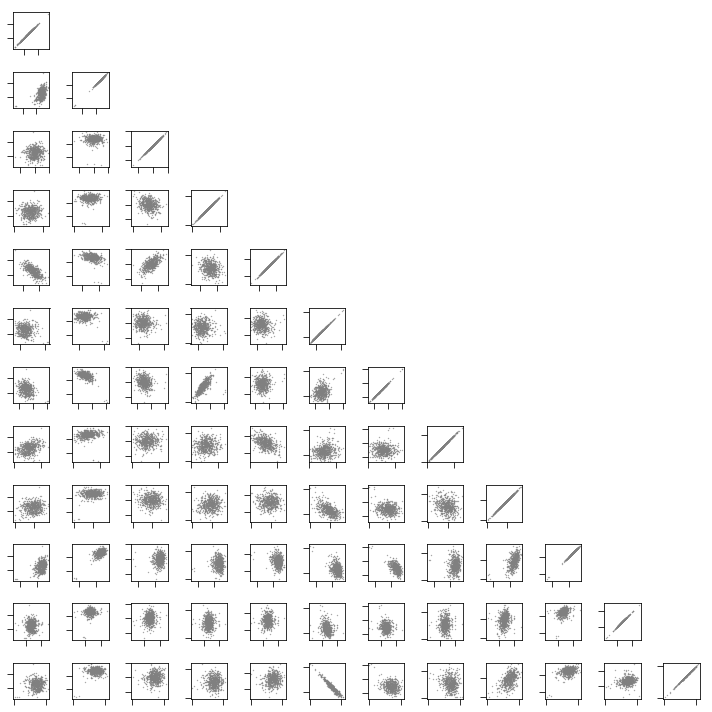

In [82]:

fig = plt.figure(figsize=(10,10))

for ix,x in enumerate(pltcategories):
    for iy,y in enumerate(pltcategories):
        if ix<iy : continue
        ax = fig.add_subplot(12,12,12*ix+iy+1)
        ax.scatter(PL20[x][::100],PL20[y][::100],color='grey',s=0.1)
        ax.set_xticklabels(())
        ax.set_yticklabels(())
        
        
plt.tight_layout()
plt.savefig('/Users/mpetersen/Downloads/pitchcomp.png',dpi=300)
        


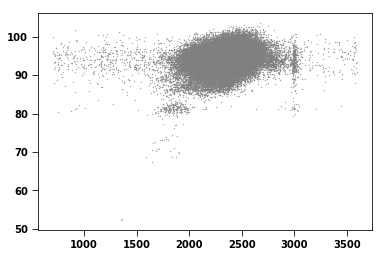

In [72]:
PL20 = pd.read_csv('processed/fourseamers_2020_R.csv')
plt.scatter(PL20['spin'],PL20['velocity'],color='grey',s=.1)